<a href="https://colab.research.google.com/github/ProgrammingWithGaurav/FruitsClassification/blob/main/Apple_vs_Banana_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d marquis03/fruits-100

 98% 617M/627M [00:04<00:00, 244MB/s]
100% 627M/627M [00:04<00:00, 159MB/s]


In [4]:
!ls

fruits-100.zip	kaggle.json  sample_data  test.jpg


In [5]:
from zipfile import ZipFile
dataset = '/content/fruits-100.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()


In [6]:
!ls

classname.txt	kaggle.json  test      test.jpg  train.csv  val.csv
fruits-100.zip	sample_data  test.csv  train	 val


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
apples = os.listdir('/content/train/apple')
apples[0:10]

['121.jpg',
 '1040.jpg',
 '875.jpg',
 '432.jpg',
 '80.jpg',
 '131.jpg',
 '383.jpg',
 '335.jpg',
 '789.jpg',
 '872.jpg']

In [9]:
bananas = os.listdir('/content/train/banana')
bananas[0:10]

['1136.jpg',
 '487.jpg',
 '166.jpg',
 '319.jpg',
 '1078.jpg',
 '875.jpg',
 '432.jpg',
 '385.jpg',
 '789.jpg',
 '45.jpg']

In [10]:
len(bananas), len(apples)

(400, 400)

# Creating Labels for the two class of Images
Apples -> 1 Banana -> 0

In [11]:
# create the labels
apple_labels = [1] * 400
banana_labels = [0] * 400

In [12]:
apple_labels[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [13]:
labels = banana_labels+ apple_labels
print(len(labels))
print(labels[0:5], labels[-5:])

800
[0, 0, 0, 0, 0] [1, 1, 1, 1, 1]


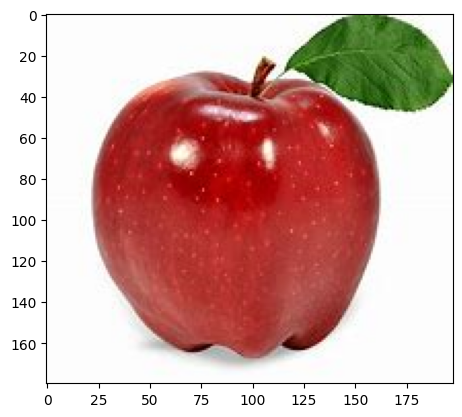

In [14]:
img = mpimg.imread('/content/train/apple/0.jpg')
implot = plt.imshow(img)
plt.show()

In [15]:
banana_path = '/content/train/banana/'
data = []

for img_file in bananas:
  image = Image.open(banana_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)

  data.append(image)


In [16]:
apple_path = '/content/train/apple/'

for img_file in apples:
  image = Image.open(apple_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)

  data.append(image)


In [17]:
data

[array([[[159, 140, 126],
         [172, 153, 139],
         [171, 152, 138],
         ...,
         [147, 152,  88],
         [150, 155,  90],
         [153, 158,  92]],
 
        [[161, 140, 127],
         [170, 148, 136],
         [171, 150, 137],
         ...,
         [141, 146,  82],
         [144, 149,  84],
         [148, 153,  87]],
 
        [[166, 141, 129],
         [161, 136, 124],
         [159, 133, 122],
         ...,
         [134, 139,  75],
         [139, 144,  79],
         [144, 149,  83]],
 
        ...,
 
        [[227, 212, 209],
         [187, 168, 165],
         [191, 168, 165],
         ...,
         [112,  51,  33],
         [ 99,  46,  26],
         [102,  54,  32]],
 
        [[249, 235, 232],
         [206, 187, 185],
         [185, 164, 162],
         ...,
         [105,  50,  30],
         [ 91,  44,  21],
         [ 97,  56,  32]],
 
        [[252, 238, 235],
         [233, 219, 217],
         [182, 162, 161],
         ...,
         [ 99,  47,  26],
  

In [18]:
X = np.array(data)
Y = np.array(labels)

In [19]:
X_flat = X.reshape((X.shape[0], -1))

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.1, random_state=10)
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10)


In [21]:
x_train[100]

array([ 80, 145,  30, ..., 120, 147,  75], dtype=uint8)

In [22]:
y_train[100]

1

In [23]:
# feature scaling
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [29]:
from sklearn.metrics import accuracy_score
# On Training Data
train_pred = model.predict(x_train_scaled)
train_acc = accuracy_score(y_train, train_pred)

# On Test Data
test_pred = model.predict(x_test_scaled)
test_acc = accuracy_score(y_test, test_pred)


In [30]:
train_acc, test_acc

(1.0, 0.75)

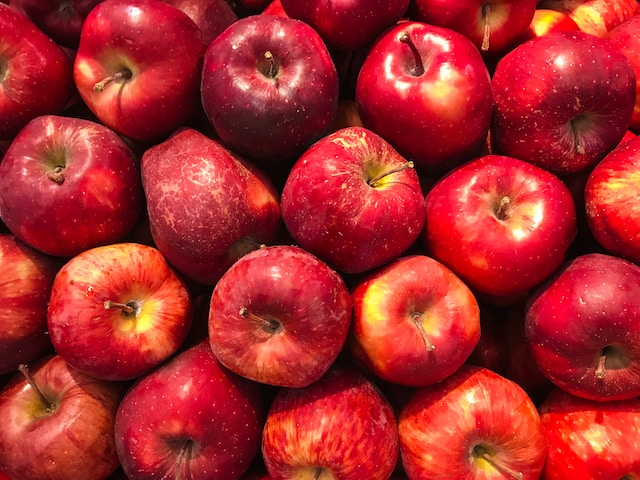

[1]


'Apple'

In [32]:
# @title Predictive System
input_image_path = "test.jpg" # @param {type:"string"}
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_reshaped = np.reshape(input_image_resized, [1,128, 128, 3])
input_image_flatten = input_image_reshaped.reshape((input_image_reshaped.shape[0], -1))
input_image_scaled = input_image_flatten/255

input_pred = model.predict(input_image_scaled)
print(input_pred)
'Apple' if input_pred == 1 else 'Banana'